In [1]:
import keras

Using Theano backend.


In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')

#convert class vectors to binary class matrices
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = SGD()

In [6]:
%time model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

#Faster! But similar accuracies

CPU times: user 13.4 ms, sys: 3.01 ms, total: 16.4 ms
Wall time: 15.5 ms


In [8]:
h = model.fit(X_train, Y_train, batch_size =128, nb_epoch=10, validation_data = (X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.1692 - acc: 0.9513 - val_loss: 0.1553 - val_acc: 0.9534
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.1452 - acc: 0.9585 - val_loss: 0.1393 - val_acc: 0.9589
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.1267 - acc: 0.9638 - val_loss: 0.1256 - val_acc: 0.9619
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.1124 - acc: 0.9675 - val_loss: 0.1162 - val_acc: 0.9646
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.1008 - acc: 0.9712 - val_loss: 0.1092 - val_acc: 0.9676
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0912 - acc: 0.9739 - val_loss: 0.1066 - val_acc: 0.9685
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0828 - acc: 0.9765 - val_loss: 0.0984 - val_acc: 0.9701
Epoch 8/10
60000/60000 [==============================] - 1s 

In [9]:
W1,b1,W2,b2 = model.get_weights()

In [10]:
W1

array([[-0.00142565, -0.0039606 ,  0.02717272, ..., -0.0751051 ,
        -0.051087  ,  0.07243567],
       [-0.03458139, -0.0731325 , -0.03527547, ...,  0.04692741,
        -0.05621677,  0.03705913],
       [-0.06424583, -0.03103889,  0.03405401, ...,  0.07431195,
         0.06210379,  0.06233215],
       ..., 
       [ 0.01557853, -0.00960844,  0.06059841, ...,  0.05338147,
        -0.04973355, -0.05201685],
       [ 0.07296682,  0.02758776,  0.07728355, ..., -0.0434236 ,
        -0.05702476,  0.07888623],
       [-0.07560469,  0.07323047, -0.01223268, ...,  0.0253329 ,
         0.00402967,  0.07876542]], dtype=float32)

In [11]:
b1

array([ 0.10043832, -0.01948167, -0.20526308,  0.1697733 ,  0.05429776,
        0.06825454, -0.16141129, -0.02457692, -0.06833612,  0.00156426,
        0.05099694,  0.21819581,  0.05773035,  0.1602226 ,  0.12114451,
        0.11984398, -0.05610244, -0.10449342,  0.06484786, -0.04748415,
        0.13827489, -0.12775253,  0.16993891,  0.21210749,  0.1097947 ,
        0.00660071, -0.0896866 ,  0.19720465,  0.04307061,  0.04439583,
       -0.04021802,  0.03605755,  0.11102908, -0.05793058,  0.15769356,
       -0.03352894, -0.18268993,  0.0493525 , -0.2475979 ,  0.12382589,
        0.09176745, -0.02558048,  0.04790801, -0.19995564,  0.08324167,
       -0.0495948 , -0.23537102, -0.03101009, -0.17778596, -0.1031969 ,
       -0.01379864,  0.01385268,  0.18692754,  0.09095317, -0.04954295,
        0.04671147,  0.21246202,  0.03720361, -0.19869503, -0.02805918,
       -0.01668784, -0.17730269, -0.06832355,  0.02500791, -0.05643343,
        0.03641709,  0.15413758,  0.31146437, -0.07556383, -0.17

In [12]:
W2

array([[-0.35971317, -0.26416251, -0.32802197, ...,  0.17337452,
         0.38448581, -0.2042591 ],
       [-0.40945843,  0.30648831, -0.09525179, ..., -0.52708691,
         0.27038845,  0.2587904 ],
       [ 0.40596169, -0.15574837,  0.10904593, ..., -0.86787289,
         0.191301  ,  0.08272504],
       ..., 
       [ 0.47285885,  0.16921343, -0.29229778, ..., -0.77490544,
        -0.37667841, -1.22462893],
       [-1.1226666 ,  0.40737879, -0.07175156, ..., -0.31696981,
        -0.22141723,  0.35308376],
       [-0.62327641,  0.16015658,  0.32016051, ..., -0.57516301,
         0.33864042, -0.49780947]], dtype=float32)

In [13]:
b2

array([-0.05197818,  0.01832528, -0.00856542, -0.06612796, -0.02183302,
       -0.01136812, -0.00802951, -0.01080517, -0.05100304,  0.03965207], dtype=float32)

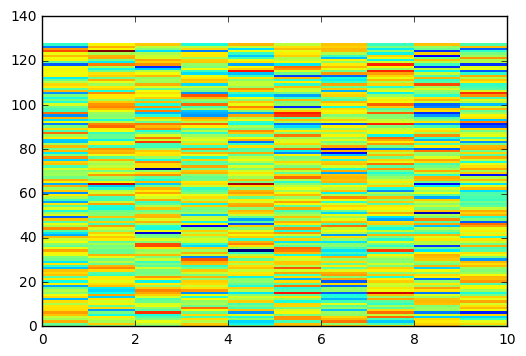

In [16]:
import matplotlib.pyplot as plt
plt.ion()
plt.pcolormesh(W2)

In [19]:
from keras.utils.visualize_util import model_to_dot

In [ ]:
#Not changing everything in belowbo


https://github.com/fchollet/keras/wiki/Porting-your-custom-layers-from-Keras-0.3-to-Keras-1.0